# 3Layer Neural Network

###3-Layer Neural Network form scratch using numpy

In [1]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import umap
from mpl_toolkits.mplot3d import Axes3D

# Non-Linearity

* Consider a non-linear equation
y = 3x1 - x2 + 0.5x3 + 1.5, where w0, w1, w3, b = 3, -1, 0.5, 1.5

In [3]:
n = 100  # number of sample

d = 3  # 3-dimensional

x = np.random.uniform(-1, 1, (n, d)) # generate random variables btw -1 and 1 of size (100, 3)
x

array([[-6.67128566e-01,  8.52460119e-01,  3.44235189e-01],
       [-7.35403882e-01,  3.07141385e-01, -4.70237688e-01],
       [-7.30623881e-01, -1.17118033e-01, -4.62114162e-01],
       [ 4.12544671e-01, -2.54858716e-01, -3.05311843e-01],
       [ 7.84777900e-01, -3.23571190e-01,  2.99154231e-01],
       [-8.20879929e-01, -5.35160136e-01,  5.94931101e-01],
       [ 6.78678666e-01, -3.66653820e-02, -9.48009430e-02],
       [-6.67811241e-02, -6.23445300e-01, -9.57661657e-04],
       [ 7.49485016e-01, -5.63604285e-01,  5.38451370e-01],
       [-7.51108328e-01,  4.55490597e-01,  6.05493410e-01],
       [ 9.34184794e-01, -3.39459660e-01, -4.14869317e-01],
       [ 6.71511769e-01, -3.47248104e-01, -6.55737129e-03],
       [ 8.00996541e-01, -6.61244413e-01,  1.00773910e-02],
       [ 7.56966042e-01,  8.56275461e-01, -9.99473213e-01],
       [-3.22826656e-01, -2.78130736e-01,  4.15122985e-01],
       [ 7.68361397e-01,  3.26338772e-01,  5.69586918e-01],
       [ 2.75484684e-01,  5.72808563e-01

x: (100, 3), weights: (3, 1), bias: (1,), y: (100, 1)


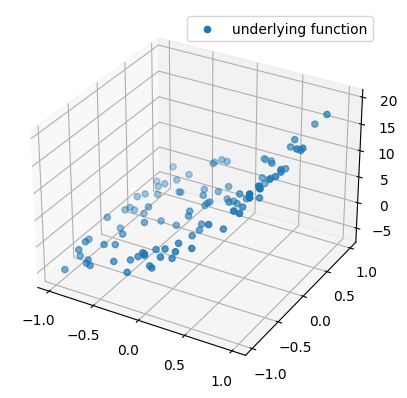

In [4]:
#y = 3x^3 - x^2 + 0.5x + 1.5

#weights_true = np.array([[3, -1, 0.5],]).T
#bias_true = np.array([1.5])

x = np.random.uniform(-1, 1, (n, 3))

weights_true = np.array([[6, 1, 1],]).T
bias_true = np.array([1])

y_true = (x ** 3) @ weights_true + (x ** 2) @ weights_true + x @ weights_true + bias_true

#y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_4d(X, y, y_pred=None):
 # Compute a 3D embedding of the data using UMAP
  umap_3d = umap.UMAP(n_components=3)
  X_umap_3d = umap_3d.fit_transform(X)
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

plot_4d(x, y_true)

In [5]:
class Linear:
  def __init__(self, input_dim, num_hidden=1):
    # The initialization is important to properly deal with different
    # input sizes (otherwise gradients quickly go to 0).
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)

  def __call__(self, x):
    return x @ self.weights + self.bias

# MSE

In [6]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred) ** 2).mean()

# Back Propagation

In [7]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)

  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [8]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)


Epoch 0, loss 50.156973026572125
Epoch 1, loss 41.56819692174629
Epoch 2, loss 34.99079820185893
Epoch 3, loss 29.853850752740694
Epoch 4, loss 25.770292200749
Epoch 5, loss 22.473680176950012
Epoch 6, loss 19.77737244207375
Epoch 7, loss 17.5480743999925
Epoch 8, loss 15.688608474287426
Epoch 9, loss 14.126616458450256
Epoch 10, loss 12.807090526319119
Epoch 11, loss 11.687384706717825
Epoch 12, loss 10.733841536862645
Epoch 13, loss 9.91947726602009
Epoch 14, loss 9.222366460739092
Epoch 15, loss 8.62449337892386
Epoch 16, loss 8.110918673943987
Epoch 17, loss 7.669162216455739
Epoch 18, loss 7.2887365150935235
Epoch 19, loss 6.9607870379104755
Epoch 20, loss 6.677809937998348
Epoch 21, loss 6.433426987734779
Epoch 22, loss 6.222203665901914
Epoch 23, loss 6.039500434712917
Epoch 24, loss 5.881350004576877
Epoch 25, loss 5.744355273080462
Epoch 26, loss 5.625603937783705
Epoch 27, loss 5.522596712065931
Epoch 28, loss 5.433186744364651
Epoch 29, loss 5.35552833552021
Epoch 30, loss 5

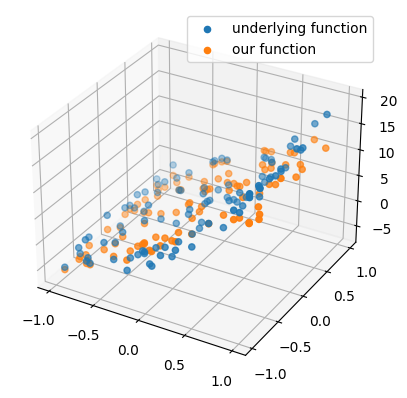

In [9]:
loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_4d(x, y_true, linear(x))

# To avoid this underfitting, introduce relu layer where it clips all the values less than 0 to 0 and leaves the rest as is.

In [10]:
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output

    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


52.989832834346835


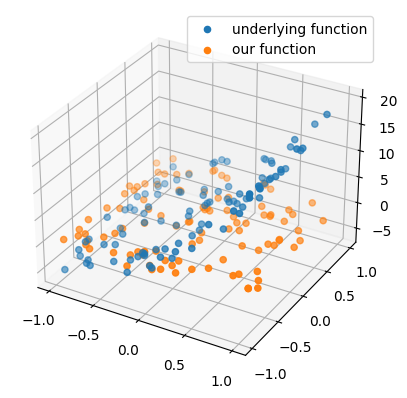

In [11]:
import torch

class Model:
  def __init__(self, input_dim, num_hidden1):
    self.linear1 = Linear(input_dim, num_hidden1)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden1, num_hidden1)
    self.linear3 = Linear(num_hidden1, 1)

  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu(l1)
    l2 = self.linear2(r1)
    r2 = self.relu(l2)
    l3 = self.linear3(r2)
    return l3

  def backward(self, output_gradient):
    linear3_gradient = self.linear3.backward(output_gradient)
    relu_gradient2 = self.relu.backward(linear3_gradient)
    linear2_gradient = self.linear2.backward(relu_gradient2)
    relu_gradient1 = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient1)
    return linear1_gradient

  def update(self, lr):
    self.linear3.update(lr)
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 20)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_4d(x, y_true, y_pred)

In [12]:
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.01)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

47.903230671793345
45.88204805961802


Epoch 0, loss 45.88204805961802
Epoch 1, loss 44.054532958254875
Epoch 2, loss 42.32671966264764
Epoch 3, loss 40.64988756292416
Epoch 4, loss 38.87624031273277
Epoch 5, loss 37.10605720707178
Epoch 6, loss 35.27939317434989
Epoch 7, loss 33.19828516821806
Epoch 8, loss 31.084782757850913
Epoch 9, loss 29.056176813932247
Epoch 10, loss 27.09220245112413
Epoch 11, loss 25.200154672870823
Epoch 12, loss 23.344425429367707
Epoch 13, loss 21.645663082639246
Epoch 14, loss 20.034421076210258
Epoch 15, loss 18.50441045692881
Epoch 16, loss 17.131315561395756
Epoch 17, loss 15.882407667487195
Epoch 18, loss 14.77952749638285
Epoch 19, loss 13.787014962571723
Epoch 20, loss 12.879812095982253
Epoch 21, loss 12.027593742195636
Epoch 22, loss 11.244621526058047
Epoch 23, loss 10.535536371611952
Epoch 24, loss 9.880679146685617
Epoch 25, loss 9.283550492734639
Epoch 26, loss 8.742718230066927
Epoch 27, loss 8.264981564580626
Epoch 28, loss 7.812978702134693
Epoch 29, loss 7.387128294855
Epoch 30,

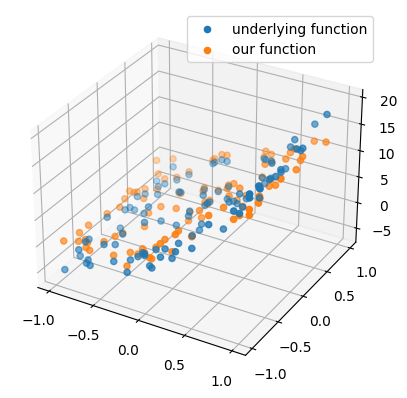

In [13]:
fit(x, y_true, model=model, loss=loss, lr=0.01, num_epochs=40)
plot_4d(x, y_true, model(x))

* With learning rate = 0.01, our model fits well with the data points.